<a href="https://colab.research.google.com/github/mmartin46/Data_Science_Research/blob/main/CelebTextMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mark 16:16

In [1]:
import pandas as pd
import altair as alt
from altair import Chart, X, Y, Color, Scale
import datetime as dt
import matplotlib.pyplot as plt
from pandas.core.common import random_state
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
import re

In [2]:
df = pd.read_csv('celeb_data.csv')
df.sort_values(by=['height'], inplace=True)

In [3]:
heights = []
for height in df['height']:
  heights.insert(len(heights), re.sub("[\(\[].*?[\)\]]", "", str(height)))

df['height'] = heights

In [4]:
df = df[df['height'] != 'nan']
df['height'] = df['height'].str.strip()

<ipython-input-4-76596cf3450f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['height'] = df['height'].str.strip()


In [5]:
df['height'] = df['height'].str.replace('½', '.5').str.replace('¼','.25').str.replace('¾', '.75')
df['height'] = df['height'].str.replace('′',"'")
df['height'] = df['height'].str.replace('″','"')

<ipython-input-5-3ff059336d70>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['height'] = df['height'].str.replace('½', '.5').str.replace('¼','.25').str.replace('¾', '.75')
<ipython-input-5-3ff059336d70>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['height'] = df['height'].str.replace('′',"'")
<ipython-input-5-3ff059336d70>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [6]:
r = re.compile(r"([0-9]+)' ([0-9]*\.?[0-9]+)\"")
def getInches(feet):
  m = r.match(feet)
  if m == None:
    return float('NaN')
  else:
    return int(m.group(1))*12 + float(m.group(2))
df['height'] = df['height'].apply(getInches)

<ipython-input-6-920728d021d3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['height'] = df['height'].apply(getInches)


In [7]:
df.dropna(inplace=True)
df

<ipython-input-7-b5dde2205341>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


,Rank,Name,Date_of_birth,height,Role,Awards,Famous_for,Birth_place
43,44,Karen Gillan,1987-11-28,70.75,"['Actress', 'Director', 'Writer']",8 wins,Selfie,"Inverness, Scotland, UK"
54,55,Hannah Waddingham,1974-07-28,70.75,"['Actress', 'Soundtrack', 'Producer']","12 wins , 16 nominations total",Ted Lasso,"London, England, UK"
29,30,Lauren Lapkus,1985-09-06,70.00,"['Actress', 'Writer', 'Music Department']","2 wins , 3 nominations total",The Wrong Missy,"Chicago, Illinois, USA"
84,85,Matt Damon,1970-10-08,70.00,"['Actor', 'Producer', 'Writer']","37 wins , 154 nominations total",Good Will Hunting,"Boston, Massachusetts, USA"
41,42,Jess Bush,1992-03-26,70.00,['Actress'],1 nomination,Star Trek: Strange New Worlds,"Brisbane, Queensland"
...,...,...,...,...,...,...,...,...
59,60,Josh Hartnett,1978-07-21,75.00,"['Actor', 'Producer']",3 wins,Lucky Number Slevin,"St. Paul, Minnesota, USA"
36,37,Angus Sampson,1979-02-12,75.00,"['Actor', 'Director', 'Writer']",7 nominations,The Lincoln Lawyer,Australia
96,97,John Krasinski,1979-10-20,75.00,"['Actor', 'Director', 'Producer']","18 wins , 79 nominations total",Tom Clancy's Jack Ryan,"Newton, Massachusetts, USA"
89,90,Alexander Skarsgård,1976-08-25,76.50,"['Actor', 'Director', 'Producer']","13 wins , 35 nominations total",The Legend of Tarzan,"Stockholm, Stockholms län, Sweden"


In [8]:
from datetime import datetime, date

def getAge(birthDate):
  born = datetime.strptime(birthDate, "%Y-%m-%d").date()
  today = date.today()
  val = today.year - born.year - ((today.month, today.day) < (born.month, born.day))
  return int(val)
df['Age'] = df['Date_of_birth'].apply(getAge)
df.dropna(inplace=True)

In [9]:
df[['Year', 'Month', 'Day']] = df['Date_of_birth'].str.split('-', expand=True)
df

,Rank,Name,Date_of_birth,height,Role,Awards,Famous_for,Birth_place,Age,Year,Month,Day
43,44,Karen Gillan,1987-11-28,70.75,"['Actress', 'Director', 'Writer']",8 wins,Selfie,"Inverness, Scotland, UK",35,1987,11,28
54,55,Hannah Waddingham,1974-07-28,70.75,"['Actress', 'Soundtrack', 'Producer']","12 wins , 16 nominations total",Ted Lasso,"London, England, UK",49,1974,07,28
29,30,Lauren Lapkus,1985-09-06,70.00,"['Actress', 'Writer', 'Music Department']","2 wins , 3 nominations total",The Wrong Missy,"Chicago, Illinois, USA",37,1985,09,06
84,85,Matt Damon,1970-10-08,70.00,"['Actor', 'Producer', 'Writer']","37 wins , 154 nominations total",Good Will Hunting,"Boston, Massachusetts, USA",52,1970,10,08
41,42,Jess Bush,1992-03-26,70.00,['Actress'],1 nomination,Star Trek: Strange New Worlds,"Brisbane, Queensland",31,1992,03,26
...,...,...,...,...,...,...,...,...,...,...,...,...
59,60,Josh Hartnett,1978-07-21,75.00,"['Actor', 'Producer']",3 wins,Lucky Number Slevin,"St. Paul, Minnesota, USA",45,1978,07,21
36,37,Angus Sampson,1979-02-12,75.00,"['Actor', 'Director', 'Writer']",7 nominations,The Lincoln Lawyer,Australia,44,1979,02,12
96,97,John Krasinski,1979-10-20,75.00,"['Actor', 'Director', 'Producer']","18 wins , 79 nominations total",Tom Clancy's Jack Ryan,"Newton, Massachusetts, USA",43,1979,10,20
89,90,Alexander Skarsgård,1976-08-25,76.50,"['Actor', 'Director', 'Producer']","13 wins , 35 nominations total",The Legend of Tarzan,"Stockholm, Stockholms län, Sweden",46,1976,08,25


In [10]:
def getWins(string):
  if 'wins' in string:
    wins = string.partition("wins")[0].strip()
    return int(wins)
  else:
    return 0
df['Wins'] = df['Awards'].apply(getWins)

In [11]:
awardChange = df['Awards'].str.replace(', ', ',  ')

In [12]:
def getNominations(string):
  if 'nomination' in string:

    nom = string.partition("nomination")[0].strip()[-3:].strip()
    if nom[0].isdigit():
      return int(nom)
  else:
    return 0
df['Nominations'] = awardChange.apply(getNominations)

In [13]:
df['Role'].unique()


df['Actor'] = df['Role'].apply(lambda role: 'Actor' in role or 'Actress' in role)
df['Director'] = df['Role'].apply(lambda role: 'Director' in role)
df['Writer'] = df['Role'].apply(lambda role: 'Writer' in role)
df['Producer'] = df['Role'].apply(lambda role: 'Producer' in role)

In [14]:
def split_fun(s):
  lst = s.split(', ')
  city = ''
  state = ''
  country = lst[-1]
  if len(lst) > 1:
    city = lst[-2]
  if len(lst) == 3:
    state = lst[0]
  return pd.Series([city, state, country])

df[['City', 'State', 'Country']] = df['Birth_place'].apply(split_fun)

In [15]:
df["First_name"] = df["Name"].str.extract(r'^(\w+)')
df["Middle_name"] = df["Name"].str.replace(r'^\w+\s+|\s+\w+$', '')
df["Last_name"] = df["Name"].str.extract(r'(\w+)$')

<ipython-input-15-3c4d5930eb38>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Middle_name"] = df["Name"].str.replace(r'^\w+\s+|\s+\w+$', '')


In [38]:
X = np.array(df['height'])
y = np.array(df['Wins'])

X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=997)

In [39]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [40]:
y_pred = lr.predict(X_test)

[Text(0.5, 0, 'Height (inches)'), Text(0, 0.5, 'Wins')]

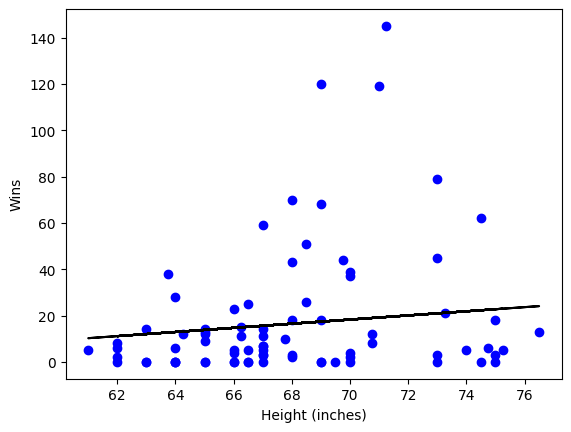

In [42]:
fig, ax = plt.subplots()

ax.scatter(X_test, y_test, color='b')
ax.plot(X_test, y_pred, color='k')
ax.set(
    xlabel='Height (inches)',
    ylabel='Wins'
)

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_true=y_test,
                          y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,
                          y_pred=y_pred)
rmse = mean_squared_error(y_true=y_test,
                          y_pred=y_pred, squared=False)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

MAE: 18.083996432122724
MSE: 792.9190133341133
RMSE: 28.15881768352701
